# Transactions Analysis

Predicting future sales based on `historical transaction` data enables retail store managers to optimize staffing schedules effectively. This approach helps prevent overstaffing during slow periods or understaffing during peak periods, allowing for a more efficient and responsive workforce management strategy. <br>

Transaction data provides a rich source of historical information on sales patterns, allowing analysts to identify recurring trends and seasonality.

In [37]:
# libraries
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
sns.set(rc={"figure.figsize":(12,12)}) 

In [38]:
transaction_df = pd.read_csv("./data/raw/transactions.csv")
store_df = pd.read_csv("./data/raw/stores.csv")
sales_store_oil_df = pd.read_csv("./data/processed/sales_store_oil_df.csv")
transaction_df.head(20)

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
5,2013-01-02,5,1903
6,2013-01-02,6,2143
7,2013-01-02,7,1874
8,2013-01-02,8,3250
9,2013-01-02,9,2940


In [39]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


In [40]:
transaction_df.describe().T

,count,mean,std,min,25%,50%,75%,max
store_nbr,83488.0,26.939237,15.608204,1.0,13.0,27.0,40.0,54.0
transactions,83488.0,1694.602158,963.286644,5.0,1046.0,1393.0,2079.0,8359.0


In [41]:
transaction_df.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

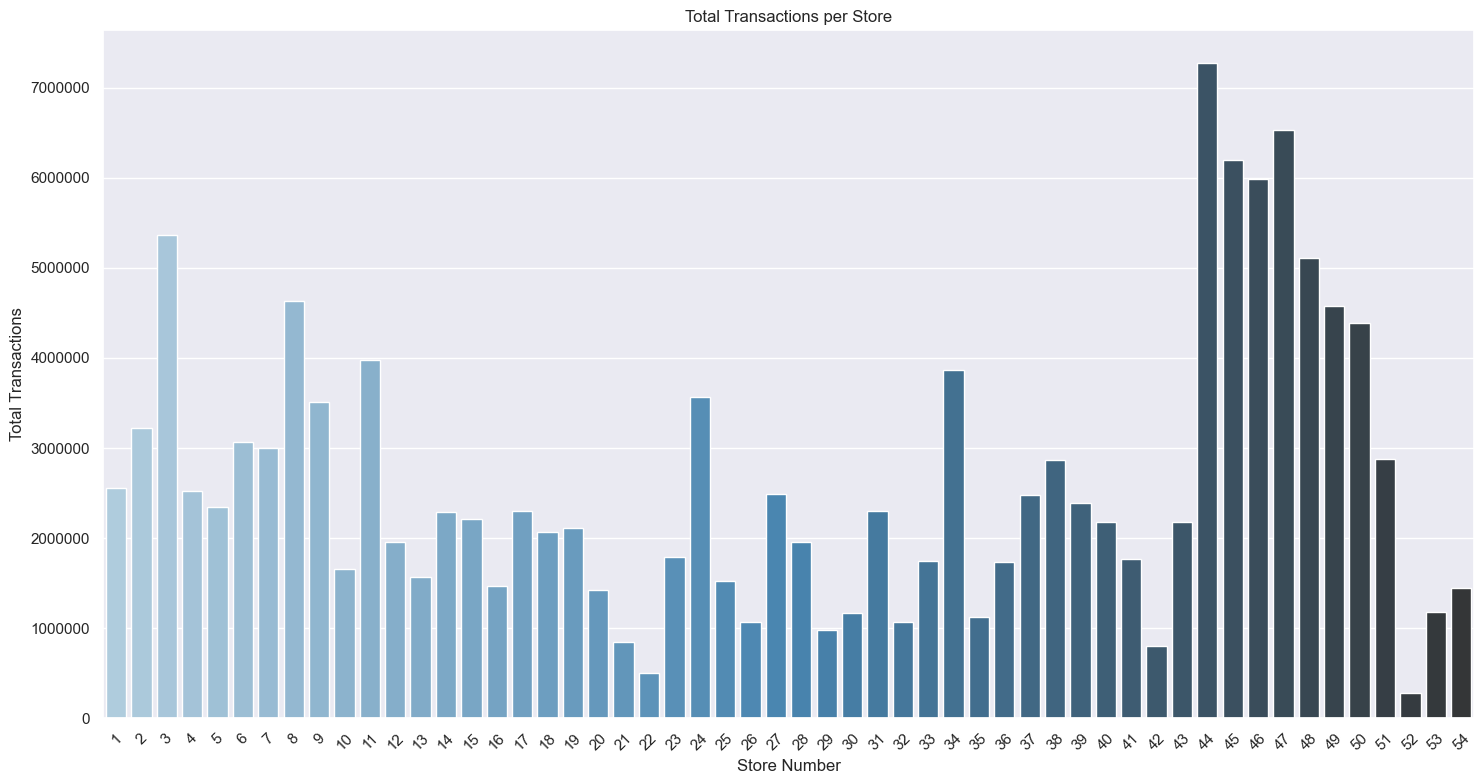

In [42]:
grouped_df = transaction_df.groupby("store_nbr")["transactions"].sum().reset_index()

plt.figure(figsize=(15, 8))
ax = sns.barplot(x='store_nbr', y='transactions', data=grouped_df, palette = "Blues_d")
plt.title('Total Transactions per Store')
plt.xlabel('Store Number')
plt.ylabel('Total Transactions')
plt.xticks(rotation=45)  # rotation and alignment
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: int(x)))
plt.tight_layout()
plt.show()

In [43]:
groped_stores = store_df.groupby("city")["store_nbr"].apply(list)

for city, numbers in groped_stores.items():
    print(f'Type: {city}, Store Numbers: {numbers}')

Type: Ambato, Store Numbers: [23, 50]
Type: Babahoyo, Store Numbers: [31]
Type: Cayambe, Store Numbers: [11]
Type: Cuenca, Store Numbers: [37, 39, 42]
Type: Daule, Store Numbers: [27]
Type: El Carmen, Store Numbers: [54]
Type: Esmeraldas, Store Numbers: [43]
Type: Guaranda, Store Numbers: [19]
Type: Guayaquil, Store Numbers: [24, 26, 28, 29, 30, 32, 34, 51]
Type: Ibarra, Store Numbers: [15]
Type: Latacunga, Store Numbers: [12, 13]
Type: Libertad, Store Numbers: [36]
Type: Loja, Store Numbers: [38]
Type: Machala, Store Numbers: [40, 41]
Type: Manta, Store Numbers: [52, 53]
Type: Playas, Store Numbers: [35]
Type: Puyo, Store Numbers: [22]
Type: Quevedo, Store Numbers: [33]
Type: Quito, Store Numbers: [1, 2, 3, 4, 6, 7, 8, 9, 10, 17, 18, 20, 44, 45, 46, 47, 48, 49]
Type: Riobamba, Store Numbers: [14]
Type: Salinas, Store Numbers: [25]
Type: Santo Domingo, Store Numbers: [5, 16, 21]


Above graph aligns with the total sales data. It was noted that during certain seasons, such as Christmas, sales in the city of Playas surpassed those in Guayaquil or Quito. This trend may be attributed to Playas having an economy centered around tourism. Nevertheless, this also indicates that the variation in seasonal sales does not correspond with the overall sales across the years. <br>

In general, stores 44, 45, 46, and 47, all surpassing 6,000,000 in sales and situated in Quito, stand out with the highest sales figures. This observation holds significance for shaping sales strategies in the city. Further investigation could shed light on why only these 4 stores in Quito achieve such notable success, especially considering the presence of 14 additional stores in the same city.<br>

It's plausible that the success of these 4 stores could be attributed to their strategic locations, possibly in the bustling city center or high-traffic areas. On the contrary, the remaining stores might be comparatively smaller or situated in less optimal locations, prompting the need for a closer examination of their specific circumstances.

In [44]:
merged_df = transaction_df.merge(sales_store_oil_df, on=["date", "store_nbr"], how="left")

In [45]:
merged_df.to_csv('./data/processed/sales_transaction_store_oil_df.csv', index=False)